In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../datasets/train_energy_data.csv")
df.sample(5)

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
695,Industrial,22427,8,13,26.21,Weekday,3880.32
344,Commercial,13357,83,31,10.63,Weekday,4114.70
481,Residential,35557,99,27,31.43,Weekend,4650.70
602,Industrial,27223,86,44,30.86,Weekend,5446.83
543,Commercial,1322,81,2,15.38,Weekend,2839.18


# Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


- Building Type : Categorical feature representing the type of building.

- Square Footage : Numeric feature representing the total square footage of the building.

- Number of Occupants : Numeric feature indicating the number of people occupying the building.

- Appliances Used : Numeric feature representing the number of appliances used in the building.

- Average Temperature : Numeric feature representing the average temperature of the building or climate area (in Celsius).

- Day of Week t\: Categorical feature representing whether the data point corresponds to a weekday or weekend.

- Energy Consumption : Numeric target variable representing the energy consumption of the building in kWh (kilowatt-hours). This is the value

In [4]:
df.describe(include="all")

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
count,1000,1000.000,1000.000000,1000.000000,1000.000000,1000,1000.000000
unique,3,NaN,NaN,NaN,NaN,2,NaN
top,Residential,NaN,NaN,NaN,NaN,Weekday,NaN
freq,347,NaN,NaN,NaN,NaN,507,NaN
mean,NaN,25462.388,48.372000,25.606000,22.611390,NaN,4166.252570
std,NaN,14294.554,29.061972,14.105166,7.139943,NaN,933.313064
min,NaN,560.000,1.000000,1.000000,10.050000,NaN,1683.950000
25%,NaN,13169.750,22.000000,13.000000,16.475000,NaN,3509.482500
50%,NaN,25477.000,47.000000,26.000000,22.815000,NaN,4175.730000
75%,NaN,37446.250,73.250000,38.000000,28.850000,NaN,4863.850000


## Checking Data Validity

### NULL


In [5]:
df.isna().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

### Duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

### Outliers

In [7]:
df_check_outlier = df.select_dtypes(exclude=["object"])

In [8]:
q1 = df_check_outlier.quantile(0.25)
q3 = df_check_outlier.quantile(0.75)
iqr = q3 - q1
low_bound = q1 - (1.5 * iqr)
up_bound = q3 + (1.5 * iqr)

outliers = ((df_check_outlier < low_bound) | (df_check_outlier > up_bound))
outliers.sum()

Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Energy Consumption     0
dtype: int64

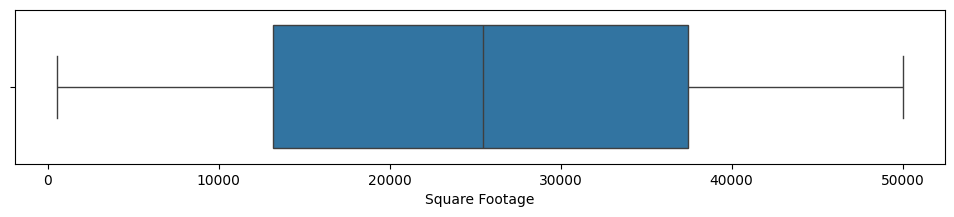

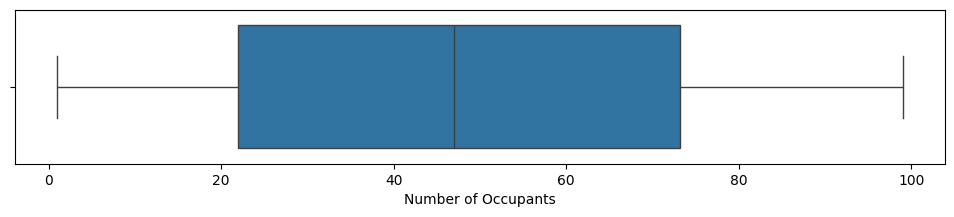

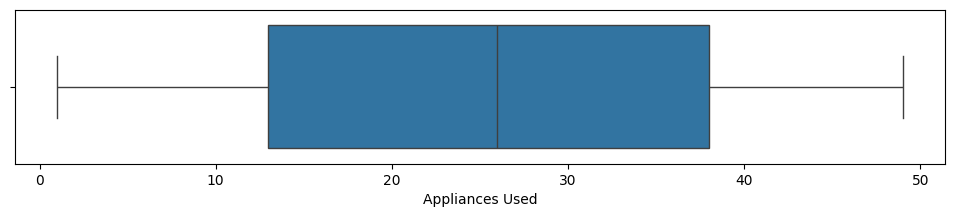

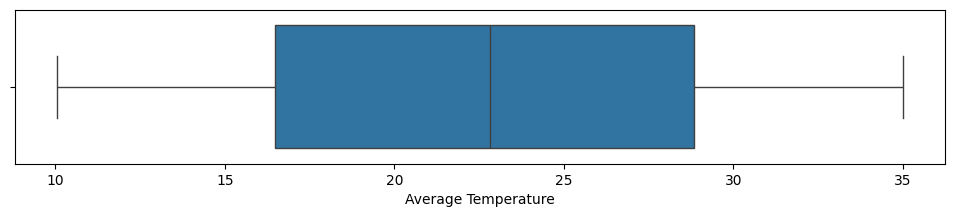

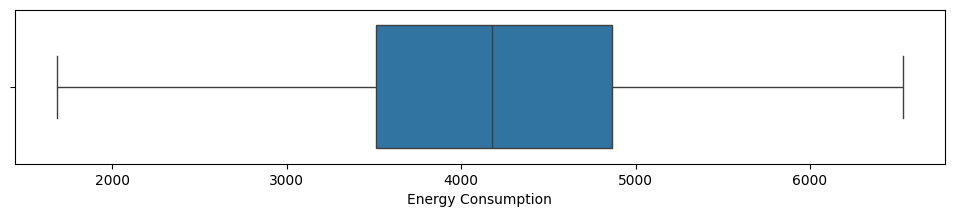

In [9]:
for x in df_check_outlier:
    plt.figure(figsize=(12, 2))
    sns.boxplot(data=df_check_outlier, x=x)

plt.show()

## Dist of Object Type Cols

In [10]:
def dist_obj_cols(feature: str):
    ax = sns.histplot(x=df[feature])

    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + (p.get_width() / 2), p.get_height()), 
                    ha='center', va='bottom', fontsize=12)
    plt.show()

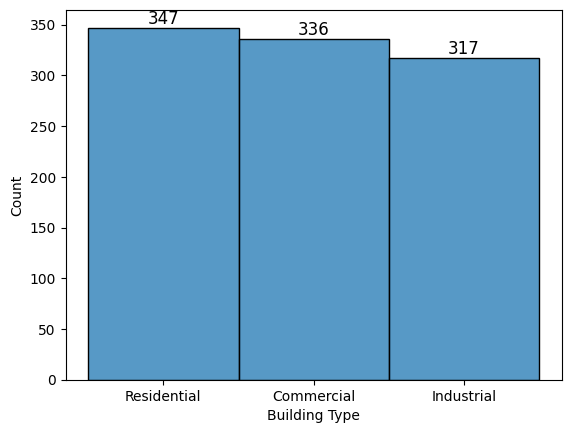

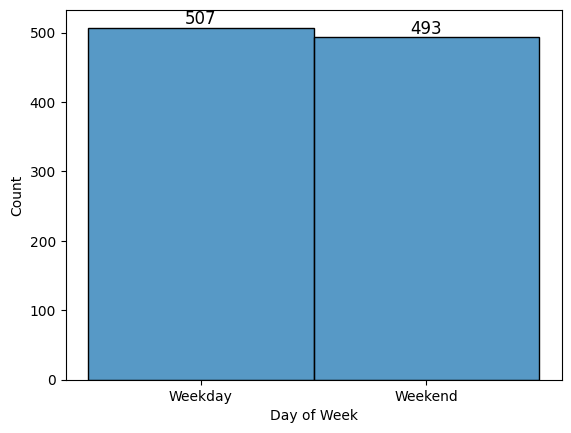

In [11]:
for x in df.columns:
    if df[x].dtype == "object":
        dist_obj_cols(x)

## Check All Numeric Data Dist

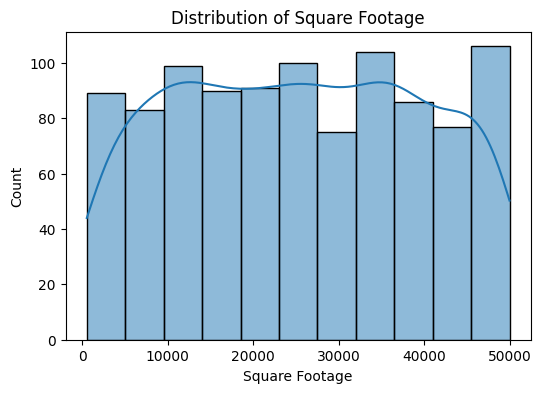

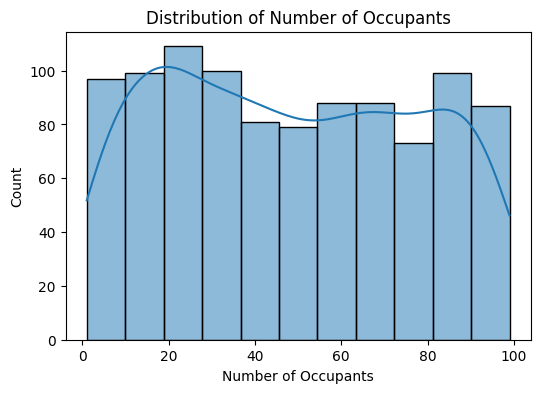

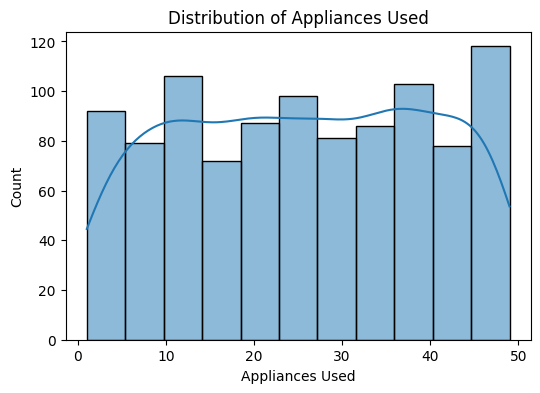

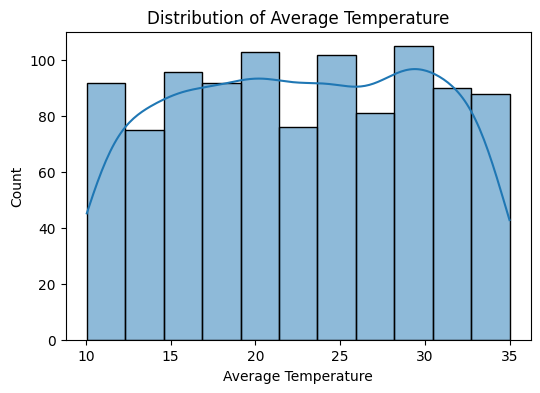

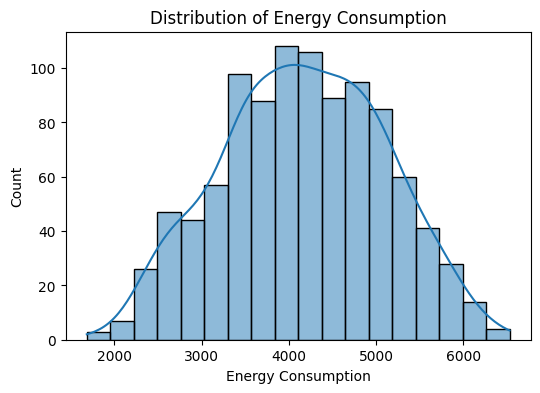

In [12]:
for x in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[x], kde=True)
    plt.title(f'Distribution of {x}')
    plt.show()

# Data Prep

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


## Object Type Cols Encoding | Using Freq Encoding

In [14]:
def freq_enc_util(data, col: list):
    new_df = data.copy()
    list_freq = []
    for x in col:
        freq = (round(new_df[x].value_counts() / (len(new_df)), 3)).to_dict()
        list_freq.append(freq)
        new_df[x] = new_df[x].map(freq)
        
    return list_freq, new_df

In [15]:
list_freq_enc, new_df = freq_enc_util(df, col=df.select_dtypes(include=["object"]).columns)

In [16]:
list_freq_enc

[{'Residential': 0.347, 'Commercial': 0.336, 'Industrial': 0.317},
 {'Weekday': 0.507, 'Weekend': 0.493}]

In [17]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   float64
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   float64
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 54.8 KB


In [18]:
# Cast all to float64
new_df = new_df.astype("float64")
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   float64
 1   Square Footage       1000 non-null   float64
 2   Number of Occupants  1000 non-null   float64
 3   Appliances Used      1000 non-null   float64
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   float64
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(7)
memory usage: 54.8 KB


In [19]:
new_df["Building Type"].value_counts()

Building Type
0.347    347
0.336    336
0.317    317
Name: count, dtype: int64

In [20]:
new_df["Day of Week"].value_counts()

Day of Week
0.507    507
0.493    493
Name: count, dtype: int64

In [21]:
new_df.sample(5)

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
447,0.336,43034.0,23.0,12.0,14.20,0.493,4550.69
849,0.336,25360.0,34.0,26.0,14.98,0.507,4103.09
354,0.347,22859.0,24.0,22.0,32.87,0.507,3208.61
782,0.317,21616.0,26.0,48.0,32.40,0.507,4688.81
297,0.347,45123.0,5.0,47.0,13.18,0.507,4730.23


# Modelling

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import pickle

## Data Splitting

In [23]:
X = new_df.iloc[:, :-1]
y = new_df.iloc[:, -1]

In [24]:
X

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week
0,0.347,7063.0,76.0,10.0,29.84,0.507
1,0.336,44372.0,66.0,45.0,16.72,0.507
2,0.317,19255.0,37.0,17.0,14.30,0.493
3,0.347,13265.0,14.0,41.0,32.82,0.507
4,0.336,13375.0,26.0,18.0,11.92,0.507
...,...,...,...,...,...,...
995,0.347,14419.0,68.0,44.0,23.95,0.493
996,0.317,12194.0,7.0,22.0,14.67,0.493
997,0.336,39562.0,88.0,20.0,32.18,0.507
998,0.347,8348.0,67.0,37.0,16.48,0.493


In [25]:
y

0      2713.95
1      5744.99
2      4101.24
3      3009.14
4      3279.17
        ...   
995    3661.21
996    3546.34
997    5147.21
998    3244.98
999    3423.63
Name: Energy Consumption, Length: 1000, dtype: float64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [27]:
X_train.tail(5)

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week
106,0.336,6776.0,84.0,29.0,17.20,0.507
270,0.317,12164.0,82.0,41.0,23.04,0.507
860,0.336,27338.0,37.0,49.0,33.14,0.507
435,0.317,27089.0,69.0,25.0,29.33,0.507
102,0.336,4970.0,21.0,17.0,29.93,0.493


In [28]:
X_test.tail(5)

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week
408,0.347,2490.0,91.0,8.0,25.03,0.507
332,0.347,23390.0,50.0,23.0,23.80,0.493
208,0.336,3593.0,88.0,41.0,22.27,0.493
613,0.347,40787.0,35.0,4.0,13.99,0.507
78,0.317,37880.0,34.0,11.0,11.92,0.507


## Feature Scaling

Gonna use MinMaxScaler because the features are uniformly distributed. CMIIW

In [29]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Dump Scaler
with open("./../models/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

X_test_scaled = scaler.transform(X_test)

In [30]:
X_train_scaled

array([[1.        , 0.53645212, 0.1122449 , 0.60416667, 0.91737203,
        0.        ],
       [0.63333333, 0.18846239, 0.04081633, 0.375     , 0.42402257,
        1.        ],
       [0.        , 0.44246373, 0.07142857, 0.25      , 0.64812576,
        1.        ],
       ...,
       [0.63333333, 0.54183444, 0.36734694, 1.        , 0.92744861,
        1.        ],
       [0.        , 0.5367961 , 0.69387755, 0.5       , 0.7738815 ,
        1.        ],
       [0.63333333, 0.08923332, 0.20408163, 0.33333333, 0.7980653 ,
        0.        ]], shape=(800, 6))

In [31]:
X_test_scaled

array([[0.63333333, 0.80192631, 0.2244898 , 0.45833333, 0.80088674,
        0.        ],
       [1.        , 0.15875842, 0.24489796, 0.72916667, 0.37686417,
        1.        ],
       [0.        , 0.95422998, 0.92857143, 0.125     , 0.91455058,
        0.        ],
       ...,
       [0.63333333, 0.06137067, 0.8877551 , 0.83333333, 0.48931882,
        0.        ],
       [1.        , 0.81396572, 0.34693878, 0.0625    , 0.15558243,
        1.        ],
       [0.        , 0.75514457, 0.33673469, 0.20833333, 0.07214833,
        1.        ]], shape=(200, 6))

## Training

In [32]:
elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train_scaled, y_train) 

ElasticNet()

In [33]:
y_pred = elasticnet_model.predict(X_test_scaled)

## Model Evaluation

In [34]:
res = pd.DataFrame({"Actual": y_test, "Pred": y_pred})
res.sample(10)

,Actual,Pred
247,5369.95,4311.651143
643,4684.93,4284.605896
902,5359.10,4307.118221
595,4958.57,4315.986705
526,4149.49,4134.250479
60,4027.56,4195.818650
959,4207.14,4217.426626
740,5781.83,4469.226093
63,2968.20,3948.630865
548,4164.50,4227.500766


In [35]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 563925.3092
R² Score: 0.3075


# Deployment

In [36]:
import pickle

with open("../models/elasticnet_model.pkl", "wb") as f:
    pickle.dump(elasticnet_model, f)